In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Desktop/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Top 5 zip codes

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships (twp) for 911 calls?

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Unique title codes in title column

In [8]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [9]:
len(df['title'].unique())

110

In [10]:
df['title'].nunique()

110

Creating new column 'Reason'for the reason of 911 call

In [11]:
x = df['title'].iloc[0]

In [12]:
x

'EMS: BACK PAINS/INJURY'

In [13]:
x.split(':')[0]

'EMS'

In [14]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [15]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

The most common Reason for 911 calls based of the new column

In [16]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Seaborn contplot of Reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

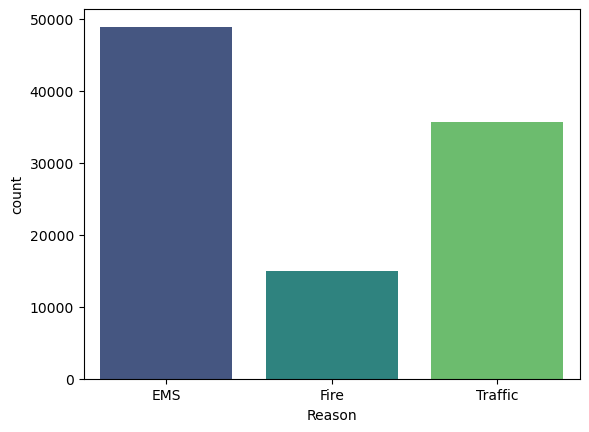

In [17]:
sns.countplot(x='Reason', data=df, palette='viridis')

Data type of the objects in the timeStamp column

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   Reason     99492 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [19]:
type(df['timeStamp'].iloc[0])

str

Converting it into DateTime objects

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [21]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
time = df['timeStamp'].iloc[0]
time.hour

17

Creating 3 new columns Hour,Month,Day of Week

In [23]:
time

Timestamp('2015-12-10 17:40:00')

In [24]:
time.hour

17

In [25]:
time.month

12

In [26]:
time.dayofweek

3

In [27]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [28]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [29]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


Maping the actual name of the day, to replace the numbers in the day of Week column

In [31]:
dmap = {0:'Mon',1:'Tue',3:'Wed',4:'Fri',5:'Sat',6:'Sun'}

In [32]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [33]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Wed
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Wed
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Wed
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Wed
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Wed


Seaborn countplot of the day of week with hue based on the Reason column

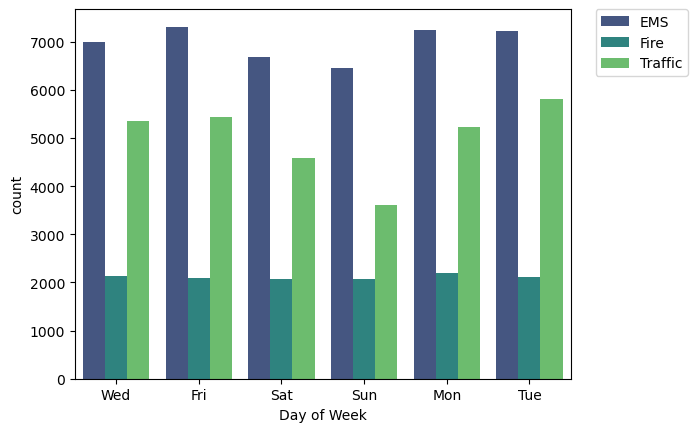

In [34]:
sns.countplot(x='Day of Week',data = df, hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

seaborn countplot of the Month with hue based on the Reason column

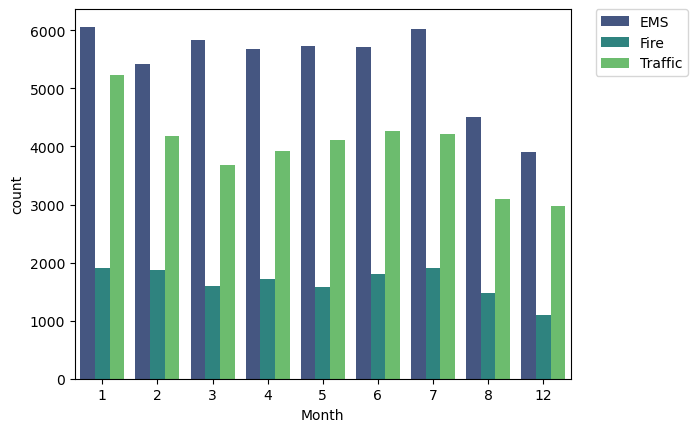

In [35]:
sns.countplot(x='Month',data = df, hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [36]:
byMonth = df.groupby('Month').count()

In [37]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11505
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9564
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9212
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9809
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9885


<AxesSubplot:xlabel='Month'>

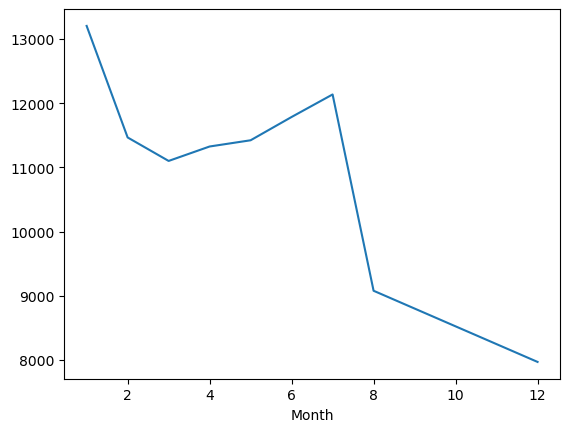

In [38]:
byMonth['lat'].plot()

lmplot to create linear fit on tje number of calls per month

In [39]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11505
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9564
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9212
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9809
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9885
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,9728
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,10420
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,7783
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,6707


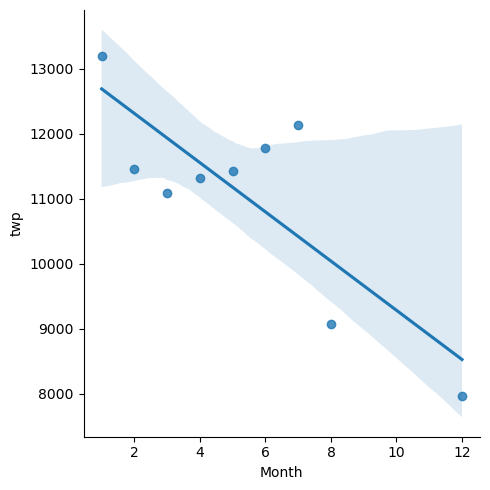

In [40]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

Creating a new column Date 

In [41]:
t = df['timeStamp'].iloc[0]

In [42]:
t

Timestamp('2015-12-10 17:40:00')

In [43]:
t.date()

datetime.date(2015, 12, 10)

In [44]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [45]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Wed,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Wed,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Wed,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Wed,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Wed,2015-12-10


Groupby() on date column

In [46]:

df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [47]:
df.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

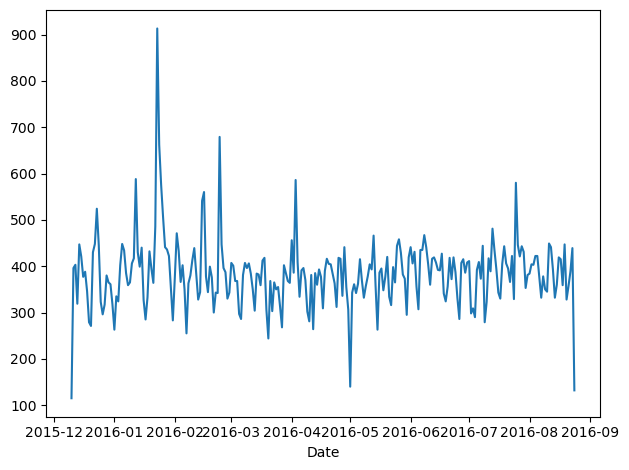

In [48]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

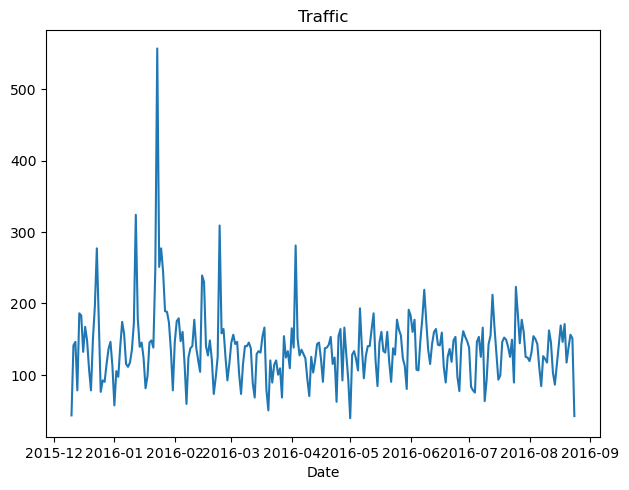

In [49]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

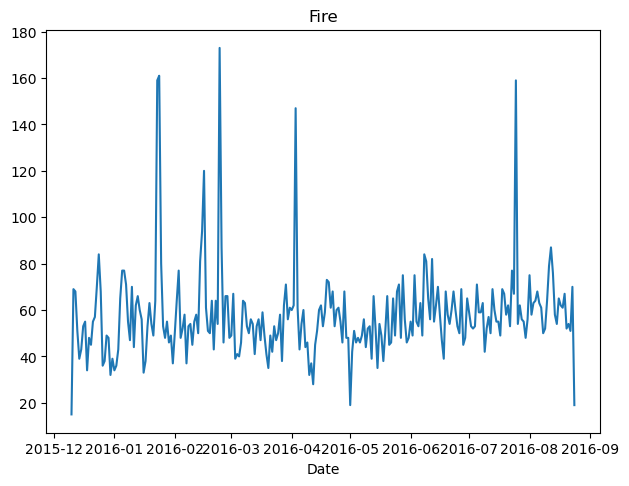

In [50]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

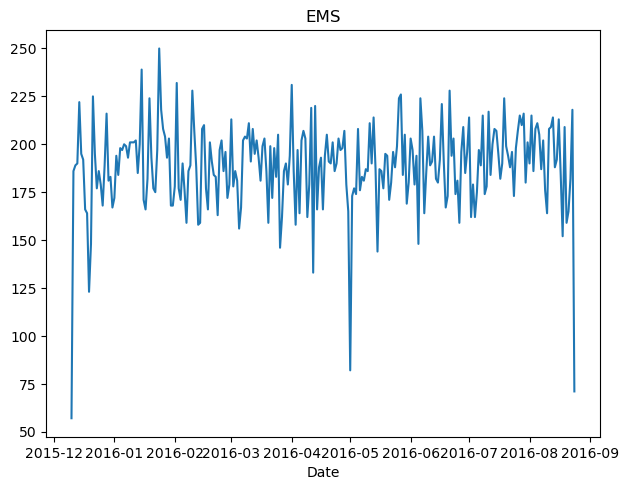

In [51]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

In [52]:
df.groupby(by=['Day of Week','Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    698  698   698  610    698        698  698   694  698   
            20    617  617   617  543    617        617  617   614  617   
            21    553  553   553  472    553        553  553   550  553   
            22    424  424   424  356    424        424  424   424  424   
            23    354  354   354  307    354        354  354   354  354   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       698    698   698  
            20       617    617   617  
            21       553    553   553  
            22       424    424   424  
            23       354    354   354  

[144 rows x 12 columns]

In [53]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

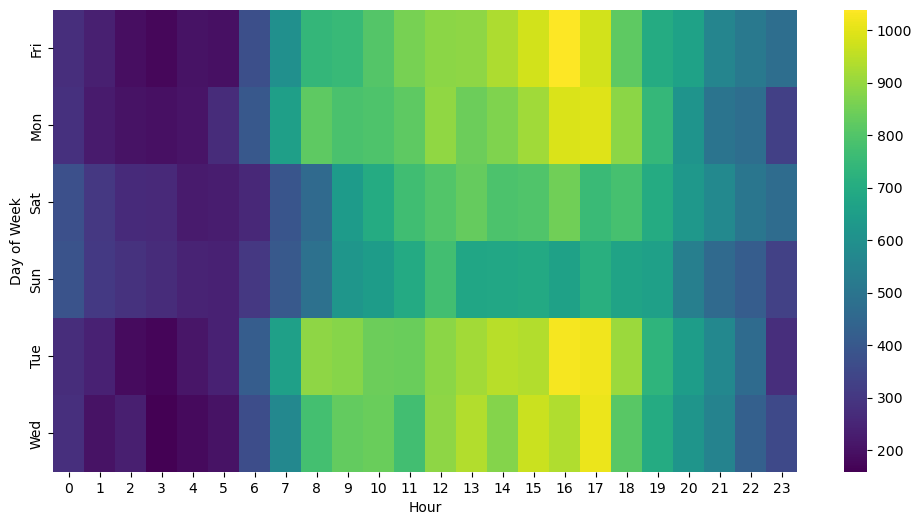

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

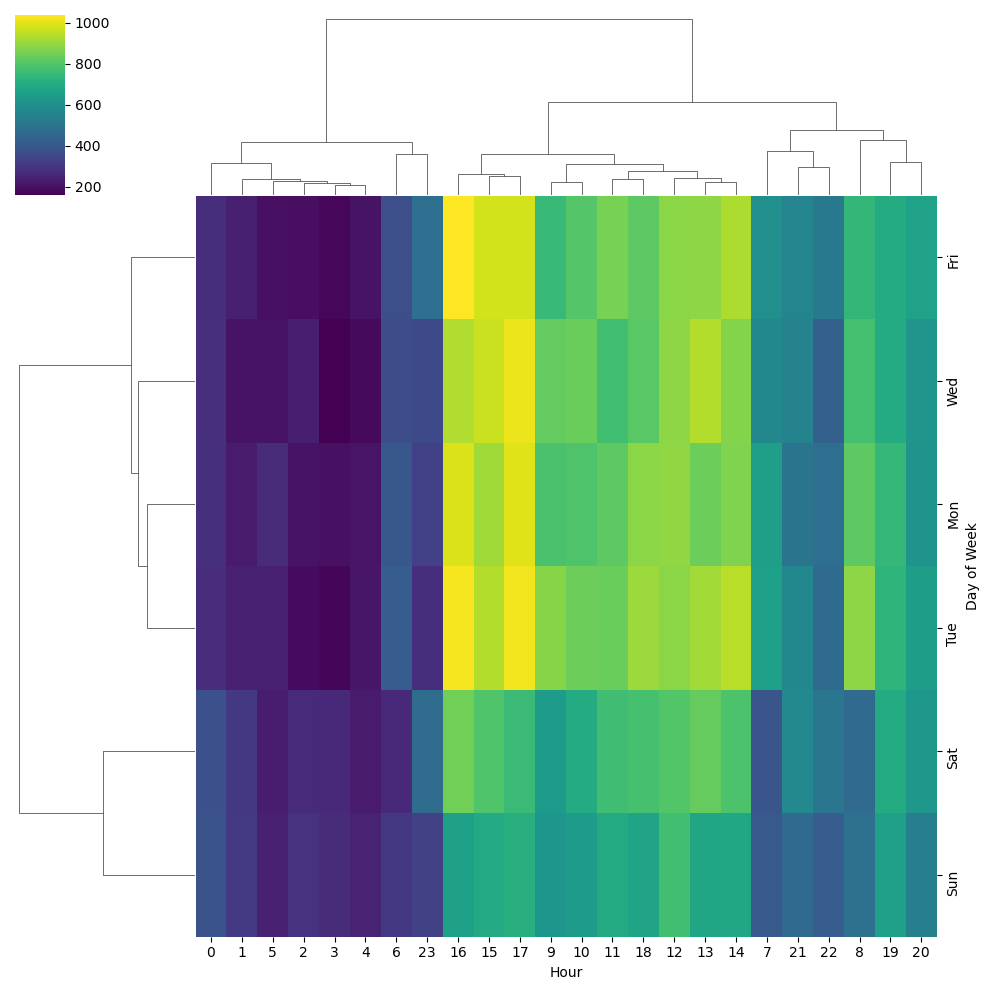

In [55]:
sns.clustermap(dayHour,cmap='viridis')

In [56]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

In [57]:
dayMonth.head()



Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

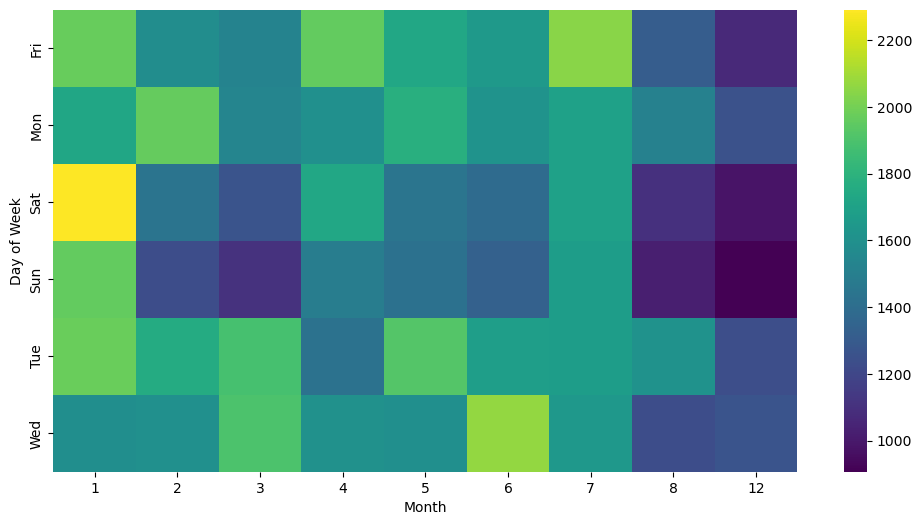

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

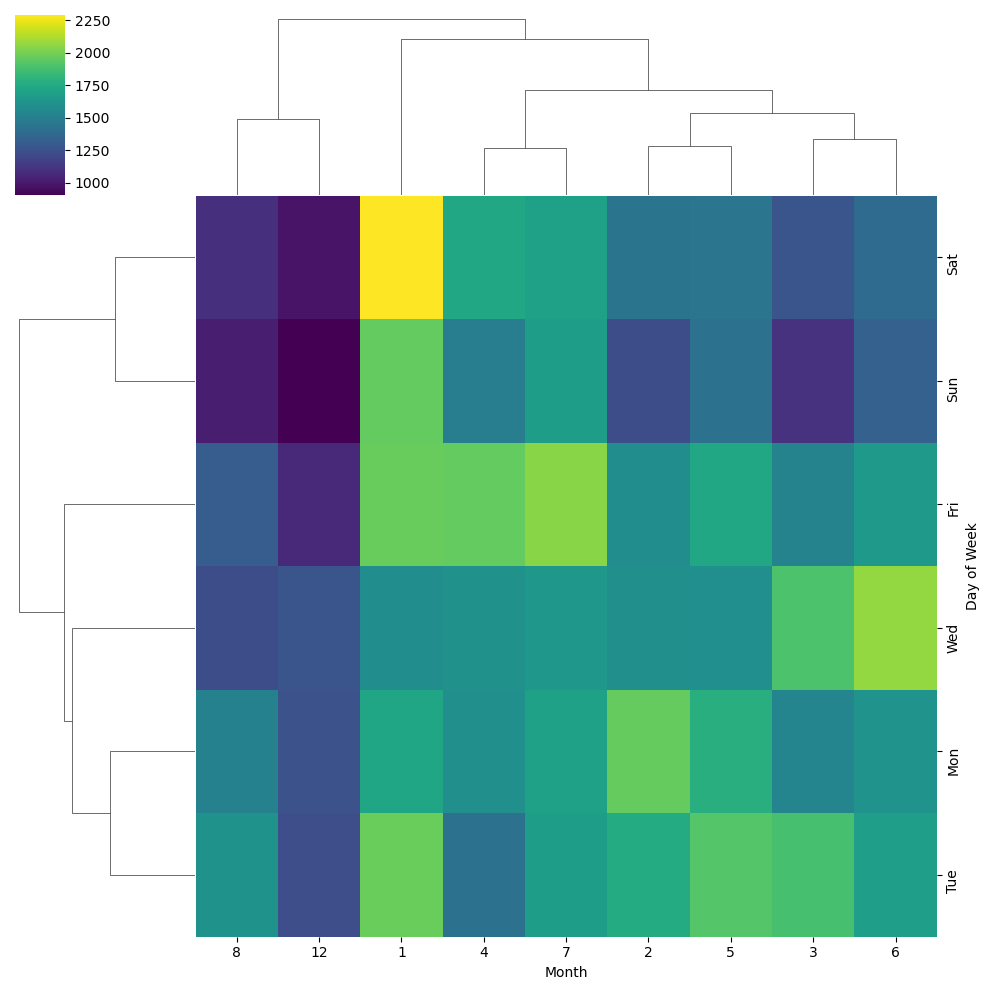

In [59]:
sns.clustermap(dayMonth,cmap='viridis')

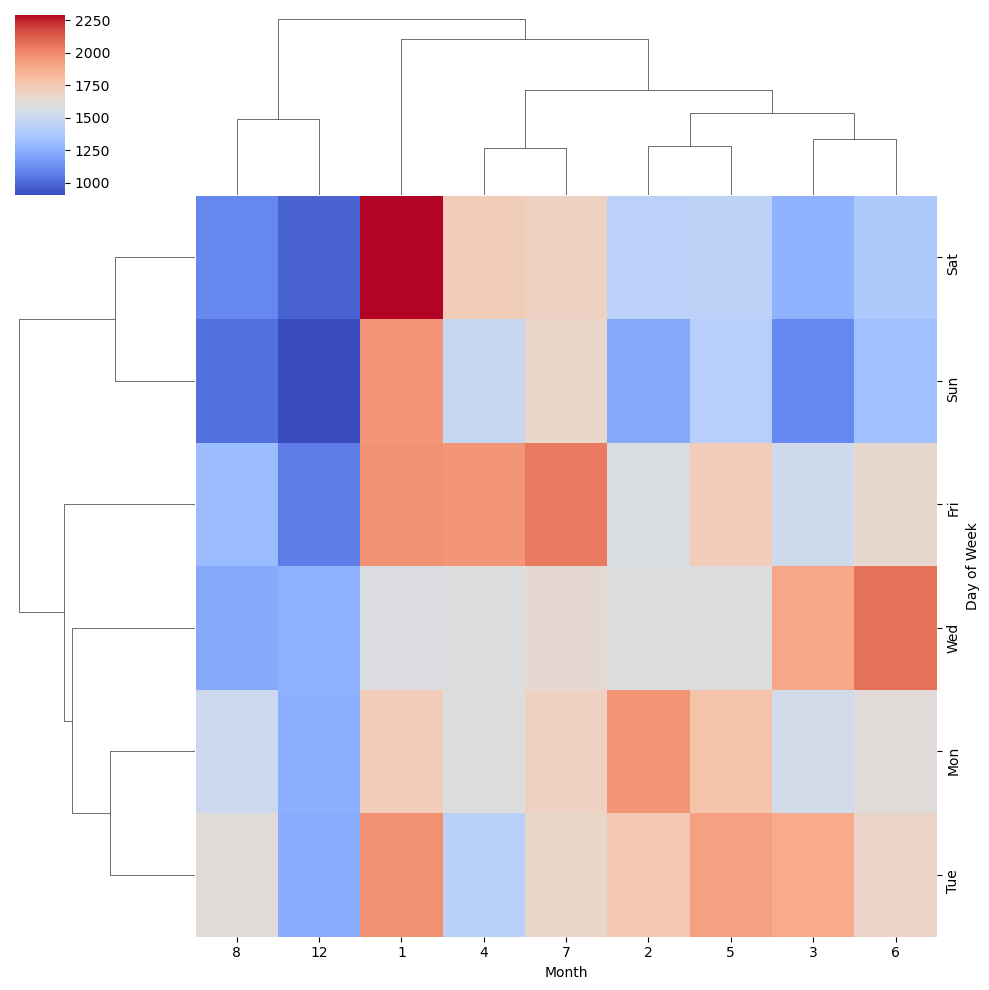

In [60]:
sns.clustermap(dayMonth,cmap='coolwarm')